## 국민연금 데이터를 활용한 연봉 추정 및 퇴직자수 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight") 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

## EDA(탐색적 데이터 분석)

### 데이터 불러오기

In [2]:
df1 = pd.read_csv('국민연금 가입 사업장 내역 1월.csv',encoding='cp949')
df2 = pd.read_csv('국민연금 가입 사업장 내역 2월.csv',encoding='cp949')
df3 = pd.read_csv('국민연금 가입 사업장 내역 3월.csv',encoding='cp949')
df4 = pd.read_csv('국민연금 가입 사업장 내역 4월.csv',encoding='cp949')
df5 = pd.read_csv('국민연금 가입 사업장 내역 5월.csv',encoding='cp949')
df6 = pd.read_csv('국민연금 가입 사업장 내역 6월.csv',encoding='cp949')
df7 = pd.read_csv('국민연금 가입 사업장 내역 7월.csv',encoding='cp949')
df8 = pd.read_csv('국민연금 가입 사업장 내역 8월.csv',encoding='cp949')
df9 = pd.read_csv('국민연금 가입 사업장 내역 9월.csv',encoding='cp949')
df10 = pd.read_csv('국민연금 가입 사업장 내역 10월.csv',encoding='cp949')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0)

### 전체적인 데이터 살펴보기

In [4]:
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,Jan-22,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,...,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,NaN,NaN,597,268966860,1,6
1,Jan-22,글로웨이 주식회사,110812,1,6072,서울특별시 강남구 청담동,서울특별시 강남구 영동대로137길,1168010400,1168056500,11,...,1,452101,미장 타일 및 방수 공사업,1988-01-01,NaN,NaN,3,1265560,0,0
2,Jan-22,신일기업(주),201810,1,4537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,...,1,381002,NaN,1988-01-01,NaN,NaN,18,5879100,0,0
3,Jan-22,디에스디엘(주),104811,1,4526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,17,4330100,0,0
4,Jan-22,(주)헤럴드,104810,1,4336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,314,119581820,4,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449333 entries, 0 to 546813
Data columns (total 22 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   자료생성년월                object
 1    사업장명                 object
 2    사업자등록번호              int64 
 3    사업장가입상태코드 1 등록 2 탈퇴  int64 
 4    우편번호                 object
 5    사업장지번상세주소            object
 6    사업장도로명상세주소           object
 7    고객법정동주소코드            int64 
 8    고객행정동주소코드            object
 9    법정동주소광역시도코드          int64 
 10   법정동주소광역시시군구코드        int64 
 11   법정동주소광역시시군구읍면동코드     int64 
 12   사업장형태구분코드 1 법인 2 개인  int64 
 13   사업장업종코드              object
 14   사업장업종코드명             object
 15   적용일자                 object
 16   재등록일자                object
 17   탈퇴일자                 object
 18   가입자수                 int64 
 19   당월고지금액               int64 
 20   신규취득자수               int64 
 21   상실가입자수               int64 
dtypes: int64(11), object(11)
memory usage: 956.2+ MB


In [6]:
df[' 사업자등록번호'] = df[' 사업자등록번호'].astype(object) #데이터 타입 변환
df[' 사업장가입상태코드 1 등록 2 탈퇴'] = df[' 사업장가입상태코드 1 등록 2 탈퇴'].astype(object)
df[' 고객법정동주소코드'] = df[' 고객법정동주소코드'].astype(object)
df[' 법정동주소광역시도코드'] = df[' 법정동주소광역시도코드'].astype(object)
df[' 법정동주소광역시시군구코드'] = df[' 법정동주소광역시시군구코드'].astype(object)
df[' 법정동주소광역시시군구읍면동코드'] = df[' 법정동주소광역시시군구읍면동코드'].astype(object)
df[' 사업장형태구분코드 1 법인 2 개인'] = df[' 사업장형태구분코드 1 법인 2 개인'].astype(object)

In [7]:
df[df.duplicated(keep=False)] # 중복된 행 출력
df = df.drop_duplicates() # 중복된 행 제거
df.shape

(5449323, 22)

In [8]:
df.isnull().sum() #결측치 개수

자료생성년월                        0
 사업장명                         0
 사업자등록번호                      0
 사업장가입상태코드 1 등록 2 탈퇴          0
 우편번호                         0
 사업장지번상세주소                    0
 사업장도로명상세주소                   0
 고객법정동주소코드                    0
 고객행정동주소코드                    0
 법정동주소광역시도코드                  0
 법정동주소광역시시군구코드                0
 법정동주소광역시시군구읍면동코드             0
 사업장형태구분코드 1 법인 2 개인          0
 사업장업종코드                      0
 사업장업종코드명                 93765
 적용일자                         0
 재등록일자                  5317246
 탈퇴일자                   5187351
 가입자수                         0
 당월고지금액                       0
 신규취득자수                       0
 상실가입자수                       0
dtype: int64

### 이상치 분석

In [9]:
df.describe() #수치형 데이터 통계값

,가입자수,당월고지금액,신규취득자수,상실가입자수
count,5449323.00,5449323.00,5449323.00,5449323.00
mean,19.32,5864079.63,0.90,0.71
std,257.31,110514952.90,11.35,10.62
min,0.00,0.00,0.00,0.00
25%,4.00,858140.00,0.00,0.00
50%,6.00,1516020.00,0.00,0.00
75%,12.00,3138640.00,1.00,0.00
max,117613.00,57232874680.00,16461.00,16587.00


In [10]:
df.describe(include='O') #범주형 데이터 통계값

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자
count,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5355558,5449323,132077,261972
unique,10,818281,8962,2,43080,5056,85153,17724,20979,18,105,123,1,2918,1338,11428,3804,1561
top,Aug-22,오하운폴댄스학원,114812,1,48059,서울특별시 금천구 가산동,,1154510100,1154551000,41,200,101,1,999999,BIZ_NO미존재사업장,1988-01-01,2022-01-01,2022-01-01
freq,549857,300,8184,5187340,7724,69846,248812,69846,59273,1441003,279664,411887,5449323,523619,726458,104834,1693,27346


### 속성 간의 관계 분석

<AxesSubplot:>

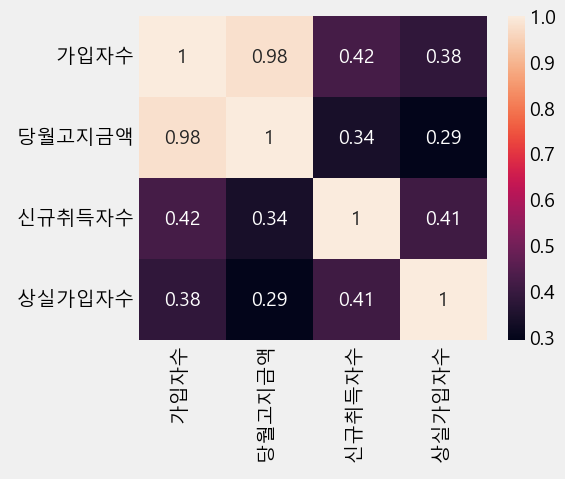

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)

## 데이터 전처리

In [12]:
df.columns

Index(['자료생성년월', ' 사업장명', ' 사업자등록번호', ' 사업장가입상태코드 1 등록 2 탈퇴', ' 우편번호',
       ' 사업장지번상세주소', ' 사업장도로명상세주소', ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드',
       ' 법정동주소광역시시군구코드', ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1 법인 2 개인',
       ' 사업장업종코드', ' 사업장업종코드명', ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수', ' 당월고지금액',
       ' 신규취득자수', ' 상실가입자수'],
      dtype='object')

In [13]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실'] #컬럼명 변경

In [14]:
len(df.columns)

22

In [15]:
len(columns)

22

In [16]:
df.columns = columns

In [17]:
df = df.drop(columns=['우편번호', '지번주소', '법정주소코드', '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', 
                      '사업장형태', '업종코드', '적용일', '재등록일', '탈퇴일']) #불필요한 컬럼 드랍

In [18]:
df['자료생성년월'].value_counts()

Aug-22     549857
2022-07    548441
Jan-22     547708
Sep-22     546959
Oct-22     546812
2022-06    545720
2022-05    544120
2022-02    543183
2022-04    542537
2022-03    533986
Name: 자료생성년월, dtype: int64

In [19]:
df['자료생성년월'] = df['자료생성년월'].replace(['Jan-22','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07',
                      'Aug-22','Sep-22','Oct-22'],[1,2,3,4,5,6,7,8,9,10]) #자료생성년월 변경

In [20]:
df = df.loc[df['가입상태'] != 2] #가입상태가 1인 데이터만 추출
df = df.loc[df['고지금액'] != 0] #고지금액이 있는 데이터만 추출(고지금액으로 연봉 추정을 하기 위함)

In [21]:
df = df.drop(columns = '가입상태') #가입상태 컬럼 드랍

In [22]:
df['업종코드명'] = df['업종코드명'].fillna('기타') #업종코드명에 결측치가 존재하는 경우는 '기타'로 대체
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6
1,1,글로웨이 주식회사,110812,서울특별시 강남구 영동대로137길,미장 타일 및 방수 공사업,3,1265560,0,0
2,1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,18,5879100,0,0
3,1,디에스디엘(주),104811,서울특별시 중구 세종대로,비주거용 건물 임대업(점포 자기땅),17,4330100,0,0
4,1,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,314,119581820,4,4


In [23]:
df_idx = df.groupby(['사업장명','사업자번호','도로명주소','업종코드명']).count()

In [24]:
df_idx.head()

,,,,자료생성년월,가입자수,고지금액,신규,상실
사업장명,사업자번호,도로명주소,업종코드명,,,,,
(One+)용인동천노인복지센터,142826,경기도 용인시 수지구 동천로,기타,10,10,10,10,10
(유) 성우이앤씨/일용/인천공항T2장기주차빌딩A등12동시설공사(PKG1)중 파일공사(A구역)-본공사,401812,인천광역시 중구 제2터미널대로,유리 및 창호 공사업,1,1,1,1,1
(주) 씨엔에이/일용/DHL INCHEON GATEWAY EXPANSION AT INCHEON INTERNATIONAL AIRPORT 수장공사,411814,인천광역시 중구 공항동로295번길,도배 실내 장식 및 내장 목공사업,2,2,2,2,2
(주) 씨엔에이/상용/DHL INCHEON GATEWAY EXPANSION AT INCHEON INTERNATIONAL AIRPORT 수장공사,411814,인천광역시 중구 공항동로295번길,도배 실내 장식 및 내장 목공사업,3,3,3,3,3
(주)지티지웰니스,229813,경기도 용인시 수지구 신수로,의료 기기 도매업,10,10,10,10,10


In [25]:
df_idx = df_idx.loc[df_idx.자료생성년월 == 10,:]

In [26]:
df_idx = df_idx.reset_index().iloc[:,:4]

In [27]:
df = pd.merge(df, df_idx, how = "inner", on = ['사업장명','사업자번호','도로명주소','업종코드명'])

In [28]:
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4


## 월급, 연봉 추정

## <국민연금 정보로 연봉정보를 계산하는 방법>
######
##### 국민연금 보험률: 9%. 즉, 급여(신고소득월액)의 9%를 국민연금으로 내는 것을 의미
##### 이를 절반으로 나누어 4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조(회사는 급여 외에 추가로 금액을 부담)
######
##### 국민연금 보험료는 소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과
##### 이를 역산하면 신고소득월액의 계산이 가능(상한선과 하한선이 설정되어 있어 실제보다 과소계산될 수 있음)
######
##### [수식]
##### 임직원 평균 월급 = 인당고지금액 / 9% * 100%
##### 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [29]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df['인당고지금액'].head()

0   450530.75
1   450617.10
2   450401.02
3   450295.95
4   449983.90
Name: 인당고지금액, dtype: float64

In [30]:
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [31]:
df['평균연봉'] = df['평균월급'] * 12

In [32]:
df['평균월급'] = round(df['평균월급'] / 10000)
df['평균연봉'] = round(df['평균연봉'] / 10000)
df["평균월급"] = df["평균월급"].astype(int)
df["평균연봉"] = df["평균연봉"].astype(int)

In [33]:
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000


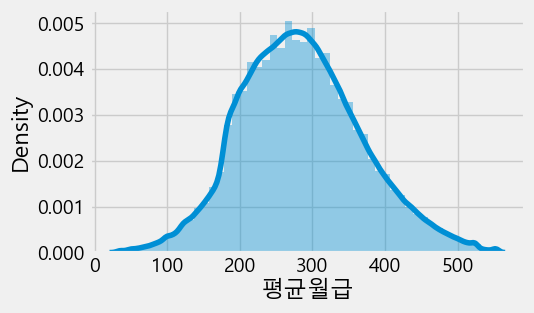

In [34]:
plt.figure(figsize=(5, 3))
sns.distplot(df.loc[df['평균월급'].notnull(), '평균월급'])
plt.show()

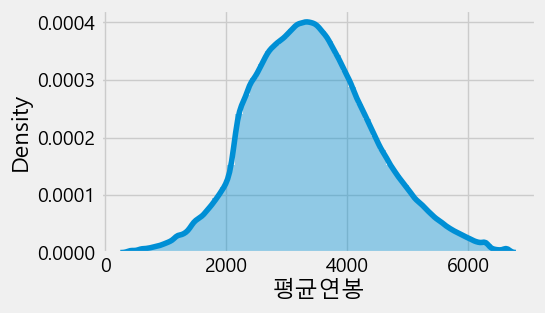

In [35]:
plt.figure(figsize=(5, 3))
sns.distplot(df.loc[df['평균연봉'].notnull(), '평균연봉'])
plt.show()

## validation

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [38]:
test = df
test.shape

(3545860, 12)

In [39]:
test.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000


In [40]:
X = test.drop(labels=['사업장명','도로명주소','업종코드명','고지금액','신규','상실','인당고지금액','평균월급'], axis = 1)
y = test.drop(labels=['사업장명','도로명주소','업종코드명','가입자수','고지금액','인당고지금액','평균월급','평균연봉'], axis = 1)

In [41]:
X.head()

,자료생성년월,사업자번호,가입자수,평균연봉
0,1,211814,597,6007
1,2,211814,593,6008
2,3,211814,590,6005
3,4,211814,588,6004
4,5,211814,584,6000


In [42]:
y.head()

,자료생성년월,사업자번호,신규,상실
0,1,211814,1,6
1,2,211814,2,8
2,3,211814,5,7
3,4,211814,5,6
4,5,211814,2,4


In [43]:
a = X.loc[X['자료생성년월'] <= 8]
a.head()

,자료생성년월,사업자번호,가입자수,평균연봉
0,1,211814,597,6007
1,2,211814,593,6008
2,3,211814,590,6005
3,4,211814,588,6004
4,5,211814,584,6000


In [44]:
b = y.loc[y['자료생성년월'] <= 8]
b.head()

,자료생성년월,사업자번호,신규,상실
0,1,211814,1,6
1,2,211814,2,8
2,3,211814,5,7
3,4,211814,5,6
4,5,211814,2,4


In [45]:
c = X.loc[X['자료생성년월'] == 9]
c.head()

,자료생성년월,사업자번호,가입자수,평균연봉
8,9,211814,580,6376
18,9,201810,19,4423
28,9,104810,312,5354
38,9,102812,853,6232
48,9,202814,42,4909


In [46]:
d = y.loc[y['자료생성년월'] == 9]
d.head()

,자료생성년월,사업자번호,신규,상실
8,9,211814,2,2
18,9,201810,0,0
28,9,104810,6,0
38,9,102812,8,8
48,9,202814,1,2


In [47]:
X_train = a #1~8월
y_train = b #1~8월 입사자, 퇴사자 수
X_valid = c #9월 
y_valid = d #9월 입사자, 퇴사자 수

In [48]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_bc = BaggingClassifier()
model_ada = AdaBoostClassifier()

In [49]:
# 가입자수와 평균연봉에 따른 신규, 상실자 수 예측
X_train['가입자수'] = X_train['가입자수'].astype('uint32')
X_train['평균연봉'] = X_train['평균연봉'].astype('uint32')
y_train['신규'] = y_train['신규'].astype('uint16')
y_train['상실'] = y_train['상실'].astype('uint16')
X_valid['가입자수'] = X_valid['가입자수'].astype('uint32')
X_valid['평균연봉'] = X_valid['평균연봉'].astype('uint32')
y_valid['신규'] = y_valid['신규'].astype('uint16')
y_valid['상실'] = y_valid['상실'].astype('uint16')

In [50]:
for column in y_train.columns:
    print(column, y_train[column].min(),y_train[column].max())

자료생성년월 1 8
사업자번호 101800 910840
신규 0 2083
상실 0 1922


In [51]:
X_train = X_train[{'가입자수','평균연봉'}]
X_valid = X_valid[{'가입자수','평균연봉'}]

In [52]:
X_train.shape

(2836688, 2)

In [53]:
y_train.shape

(2836688, 4)

In [54]:
%%timeit
model_dt.fit(X_train,y_train.신규)

12.9 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
pred = model_dt.predict(X_valid)

In [56]:
pred

array([ 1,  0,  9, ..., 10,  0,  0], dtype=uint16)

In [57]:
id_1 = c.사업자번호

In [58]:
result = pd.DataFrame(id_1)
result['신규'] = pred

In [59]:
#9월 신입 validation
result

,사업자번호,신규
8,211814,1
18,201810,0
28,104810,9
38,102812,8
48,202814,0
...,...,...
3545818,224813,0
3545828,120810,0
3545838,130810,10
3545848,217811,0


In [60]:
accuracy_score(y_valid.신규,pred)

0.7362022189257331

In [61]:
%%timeit
model_dt.fit(X_train,y_train.상실)

11.8 s ± 242 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
pred2 = model_dt.predict(X_valid)

In [63]:
pred2

array([ 1,  0,  0, ..., 26,  0,  0], dtype=uint16)

In [64]:
result['상실'] = pred2

In [65]:
#9월 상실 validation
result

,사업자번호,신규,상실
8,211814,1,1
18,201810,0,0
28,104810,9,0
38,102812,8,10
48,202814,0,0
...,...,...,...
3545818,224813,0,0
3545828,120810,0,0
3545838,130810,10,26
3545848,217811,0,0


In [66]:
accuracy_score(y_valid.상실,pred2)

0.7387150084887728

## test

In [67]:
q = X.loc[X['자료생성년월'] != 10]
q.head()

,자료생성년월,사업자번호,가입자수,평균연봉
0,1,211814,597,6007
1,2,211814,593,6008
2,3,211814,590,6005
3,4,211814,588,6004
4,5,211814,584,6000


In [68]:
w = y.loc[y['자료생성년월'] != 10]
w.head()

,자료생성년월,사업자번호,신규,상실
0,1,211814,1,6
1,2,211814,2,8
2,3,211814,5,7
3,4,211814,5,6
4,5,211814,2,4


In [69]:
e = X.loc[X['자료생성년월'] == 10]
e.head()

,자료생성년월,사업자번호,가입자수,평균연봉
9,10,211814,585,6375
19,10,201810,19,4505
29,10,104810,314,5334
39,10,102812,846,6233
49,10,202814,40,4898


In [70]:
r = y.loc[y['자료생성년월'] == 10]
r.head()

,자료생성년월,사업자번호,신규,상실
9,10,211814,7,2
19,10,201810,0,0
29,10,104810,2,5
39,10,102812,1,6
49,10,202814,0,1


In [71]:
X_train = q
y_train = w
X_test = e
y_test = r

In [72]:
# 가입자수와 평균연봉에 따른 신규, 상실자 수 예측
X_train['가입자수'] = X_train['가입자수'].astype('uint32')
X_train['평균연봉'] = X_train['평균연봉'].astype('uint32')
y_train['신규'] = y_train['신규'].astype('uint16')
y_train['상실'] = y_train['상실'].astype('uint16')
X_test['가입자수'] = X_test['가입자수'].astype('uint32')
X_test['평균연봉'] = X_test['평균연봉'].astype('uint32')
y_test['신규'] = y_test['신규'].astype('uint16')
y_test['상실'] = y_test['상실'].astype('uint16')

In [73]:
X_train = X_train[{'가입자수','평균연봉'}]
X_test = X_test[{'가입자수','평균연봉'}]

In [74]:
X_train.shape

(3191274, 2)

In [75]:
y_train.shape

(3191274, 4)

In [76]:
%%timeit
model_dt.fit(X_train,y_train.신규)

14.3 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
pred3 = model_dt.predict(X_test)

In [78]:
pred3

array([0, 1, 0, ..., 4, 0, 0], dtype=uint16)

In [79]:
id_2 = e.사업자번호

In [80]:
result2 = pd.DataFrame(id_2)

In [81]:
result2['11월 입사자 수'] = pred3
result2 = result2.drop(columns = '사업자번호')

In [82]:
result2

,11월 입사자 수
9,0
19,1
29,0
39,8
49,1
...,...
3545819,0
3545829,1
3545839,4
3545849,0


In [83]:
accuracy_score(y_test.신규,pred3)

0.7577625738184812

In [84]:
%%timeit
model_dt.fit(X_train,y_train.상실)

12.7 s ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
pred4 = model_dt.predict(X_test)

In [86]:
pred4

array([1, 0, 5, ..., 2, 0, 0], dtype=uint16)

In [87]:
result2['11월 퇴사자 수'] = pred4

In [88]:
result2

,11월 입사자 수,11월 퇴사자 수
9,0,1
19,1,0
29,0,5
39,8,7
49,1,0
...,...,...
3545819,0,0
3545829,1,0
3545839,4,2
3545849,0,0


In [89]:
accuracy_score(y_test.상실,pred4)

0.7322060092615049

## 모델 평가

In [203]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [207]:
def get_clf_eval(y_test, pred2):
    confusion = confusion_matrix(y_test, pred2)
    accuracy = accuracy_score(y_test, pred2)
    precision = precision_score(y_test, pred2)
    recall = recall_score(y_test, pred2)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train.상실)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test.상실, pred2)

In [ ]:
정밀도와 재현율의 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 thresholds, y축 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

## 고유 key 생성

In [157]:
temp_data = df

In [158]:
cols = ['사업장명', '사업자번호', '도로명주소','업종코드명']
temp_data['key'] = temp_data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
temp_data.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [159]:
temp_data = temp_data.loc[temp_data['자료생성년월'] == 10]
temp_data = temp_data[{'사업장명','사업자번호','업종코드명','도로명주소','key'}]
temp_data.head()

,key,업종코드명,도로명주소,사업장명,사업자번호
9,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...,포장용 플라스틱 성형용기 제조업,충청남도 아산시 둔포면 아산밸리남로,(주)니프코코리아,211814
19,신일기업(주) 201810 서울특별시 중구 퇴계로 기타,기타,서울특별시 중구 퇴계로,신일기업(주),201810
29,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업,잡지 및 정기 간행물 발행업,서울특별시 용산구 후암로4길,(주)헤럴드,104810
39,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업,잡지 및 정기 간행물 발행업,서울특별시 종로구 율곡로2길,연합뉴스(주),102812
49,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업,내륙 수상 여객 및 화물 운송업,서울특별시 중구 을지로,협성해운(주),202814


In [160]:
final_data = pd.concat([temp_data,result2],axis=1)
final_data = final_data[['사업장명','사업자번호','도로명주소','업종코드명','11월 입사자 수','11월 퇴사자 수','key']]
final_data.reset_index(inplace = True)
final_data = final_data.drop(columns = ['index'])
final_data.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [161]:
alldata = df.drop(columns = ['고지금액','인당고지금액'])
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [162]:
cols = ['사업장명', '사업자번호', '도로명주소','업종코드명']
alldata['key'] = alldata[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [163]:
alldata['key'].value_counts()

(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 성형용기 제조업    10
농업회사법인주식회사에이원컴퍼니 421810 강원도 원주시 문막읍 문막공단길 상품 종합 도매업       10
대성재가장애인복지센터 126822 부산광역시 해운대구 선수촌로 BIZ_NO미존재사업장           10
(주)더비엔 407860 서울특별시 마포구 마포대로 데이터베이스 및 온라인 정보 제공업          10
주식회사에이스테크 153810 충청남도 서산시 지곡면 충의로 포장용 플라스틱 성형용기 제조업       10
                                                          ..
용해신용협동조합 411820 전라남도 목포시 연산백련로1번길 신용조합                    10
오륜기업(주) 417810 전라남도 여수시 대통2길 기타                           10
주식회사 포에이스 416810 전라남도 광양시 길호1길 그 외 기타 1차 철강 제조업           10
(주)남광포리마 416810 경상북도 포항시 남구 철강로 산업용 그 외 비경화 고무제품 제조업      10
예천군가족센터 512820 경상북도 예천군 예천읍 충효로 BIZ_NO미존재사업장              10
Name: key, Length: 354586, dtype: int64

## 고유 key값 인코딩

In [164]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [165]:
encoding_columns = ['key']

In [166]:
final_data['key'] = final_data[encoding_columns].apply(encoding_label)

In [167]:
final_data.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993


In [168]:
alldata['key'] = alldata[encoding_columns].apply(encoding_label)

In [169]:
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,14336


key값 입력:  14336


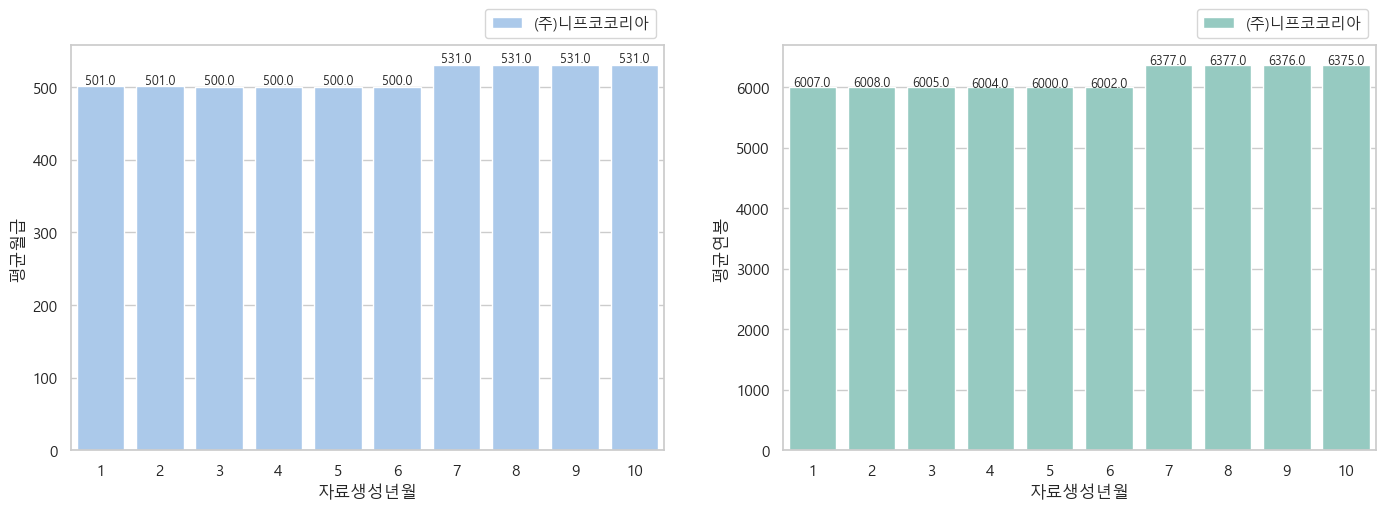

In [171]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

a = int(input("key값 입력: "))
ax1 = sns.barplot(x = alldata.loc[alldata['key'] == a]["자료생성년월"], y = alldata.loc[alldata['key'] == a]["평균월급"], 
            hue = alldata.loc[alldata['key'] == a]['사업장명'], palette='pastel', ax=area01)

ax2 = sns.barplot(x = alldata.loc[alldata['key'] == a]["자료생성년월"], y = alldata.loc[alldata['key'] == a]["평균연봉"], 
            hue = alldata.loc[alldata['key'] == a]['사업장명'], palette='Set3', ax=area02)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

ax1.legend(loc = 4, bbox_to_anchor = (1,1))
ax2.legend(loc = 4, bbox_to_anchor = (1,1))
plt.show()

In [174]:
import openpyxl

In [175]:
alldata.to_csv("alldata.csv",encoding='euc-kr')
final_data.to_csv("data.csv",encoding='euc-kr')

## MoM 계산

In [119]:
mom = df.drop(columns = ['인당고지금액'])
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [120]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [121]:
encoding_columns = ['key']

In [122]:
mom['key'] = alldata[encoding_columns].apply(encoding_label)
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,14336


In [123]:
mom['MOM'] = mom.groupby(['key']).고지금액.pct_change() *100
mom

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key,MOM
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,14336,NaN
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,14336,-0.65
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,14336,-0.55
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,14336,-0.36
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,14336,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545855,6,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2705980,0,0,188,2255,178336,0.00
3545856,7,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,0,199,2388,178336,5.90
3545857,8,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,0,199,2388,178336,0.00
3545858,9,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,1,199,2388,178336,0.00


In [124]:
mom = mom.fillna(0)
mom = mom[['자료생성년월','사업장명', '사업자번호', '도로명주소', '업종코드명', '가입자수', '신규', '상실', '고지금액', '평균월급', '평균연봉', 'MOM', 'key']]
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,고지금액,평균월급,평균연봉,MOM,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,268966860,501,6007,0.00,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,267215940,501,6008,-0.65,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,265736600,500,6005,-0.55,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,264774020,500,6004,-0.36,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,262790600,500,6000,-0.75,14336


In [125]:
MoM = mom.drop(columns = ['고지금액'])
MoM.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,MOM,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,0.00,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,-0.65,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,-0.55,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,-0.36,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,-0.75,14336


key값 입력:  14336


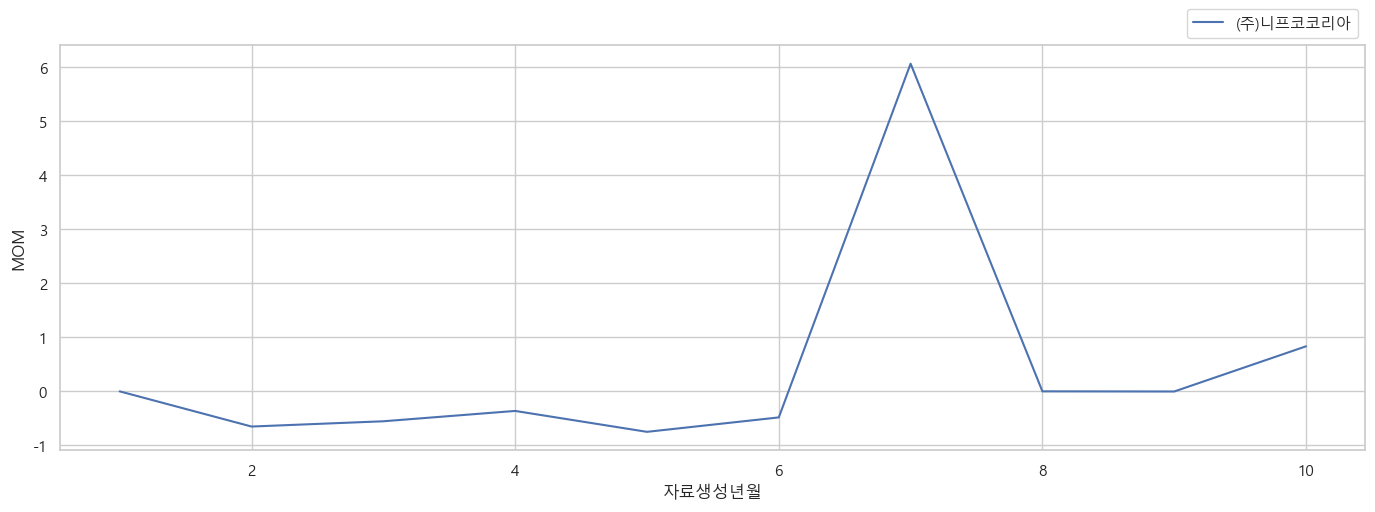

In [207]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

sfig = plt.figure(figsize=(15, 5))

a = int(input("key값 입력: "))
ax3 = sns.lineplot(x = mom.loc[mom['key'] == a]["자료생성년월"], y = mom.loc[mom['key'] == a]["MOM"],hue = mom.loc[mom['key'] == a]['사업장명'])
ax3.legend(loc = 4, bbox_to_anchor = (1,1))

sfig =ax3.get_figure()

#1, 2, 3, 4, 5, 6, 7, 8, 9, 10]x = [
#plt.xticks(x)
# sfig.savefig('filename.png',  orientation="landscape")

## CMGR 계산

In [151]:
cmgr = final_data
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993


In [152]:
ten = mom.loc[mom["자료생성년월"] == 10].고지금액.to_frame()
ten.reset_index(inplace=True)
ten = ten.drop(columns = ['index'])
ten.head()

,고지금액
0,279683880
1,6419460
2,125617700
3,395481180
4,14695260


In [153]:
one = mom.loc[mom["자료생성년월"] == 1].고지금액.to_frame()
one.reset_index(inplace=True)
one = one.drop(columns = ['index'])
one.head()

,고지금액
0,268966860
1,5879100
2,119581820
3,382843900
4,15691660


In [154]:
cmgr['1월 고지금액'] = one.고지금액
cmgr['10월 고지금액'] = ten.고지금액
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key,1월 고지금액,10월 고지금액
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,14336,268966860.00,279683880
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761,5879100.00,6419460
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481,119581820.00,125617700
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922,382843900.00,395481180
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993,15691660.00,14695260


In [155]:
cmgr['CMGR'] = (pow((cmgr['10월 고지금액'] / cmgr['1월 고지금액']), 1/9) - 1) * 100
cmgr = cmgr.drop(columns = ['1월 고지금액','10월 고지금액'])
cmgr=cmgr[['사업장명', '사업자번호', '도로명주소', '업종코드명', '11월 입사자 수', 
           '11월 퇴사자 수', 'CMGR', 'key']]
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,0.44,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993


In [156]:
a = int(input("key값 입력: "))
cmgr.loc[cmgr['key'] == a]

key값 입력:  14336


,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,0.44,14336


In [ ]:
import openpyxl

In [182]:
final_data.drop(columns = ['사업자번호','11월 입사자 수','11월 퇴사자 수']).to_csv("data.csv",encoding='euc-kr')

In [183]:
MoM.to_csv("alldata.csv",encoding='euc-kr')
cmgr.to_csv("cmgr.csv",encoding='euc-kr')

In [213]:
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,0,1,0.44,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993


In [205]:
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,14336


In [210]:
cmgr.describe()

,11월 입사자 수,11월 퇴사자 수,CMGR,key
count,354586.00,354586.00,354585.00,354586.00
mean,0.53,0.44,0.57,177292.50
std,8.32,7.03,3.20,102360.31
min,0.00,0.00,-37.67,0.00
25%,0.00,0.00,-0.70,88646.25
50%,0.00,0.00,0.45,177292.50
75%,0.00,0.00,1.78,265938.75
max,1680.00,1216.00,58.46,354585.00


In [214]:
 = pd.merge(alldata, cmgr)

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key,11월 입사자 수,11월 퇴사자 수,CMGR
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,14336,0,1,0.44
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,14336,0,1,0.44
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,14336,0,1,0.44
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,14336,0,1,0.44
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,14336,0,1,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545855,6,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,0,0,188,2255,178336,0,0,NaN
3545856,7,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,0,0,199,2388,178336,0,0,NaN
3545857,8,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,0,0,199,2388,178336,0,0,NaN
3545858,9,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,0,1,199,2388,178336,0,0,NaN


In [229]:
cmgr.describe()

,11월 입사자 수,11월 퇴사자 수,CMGR,key
count,354586.00,354586.00,354585.00,354586.00
mean,0.53,0.44,0.57,177292.50
std,8.32,7.03,3.20,102360.31
min,0.00,0.00,-37.67,0.00
25%,0.00,0.00,-0.70,88646.25
50%,0.00,0.00,0.45,177292.50
75%,0.00,0.00,1.78,265938.75
max,1680.00,1216.00,58.46,354585.00


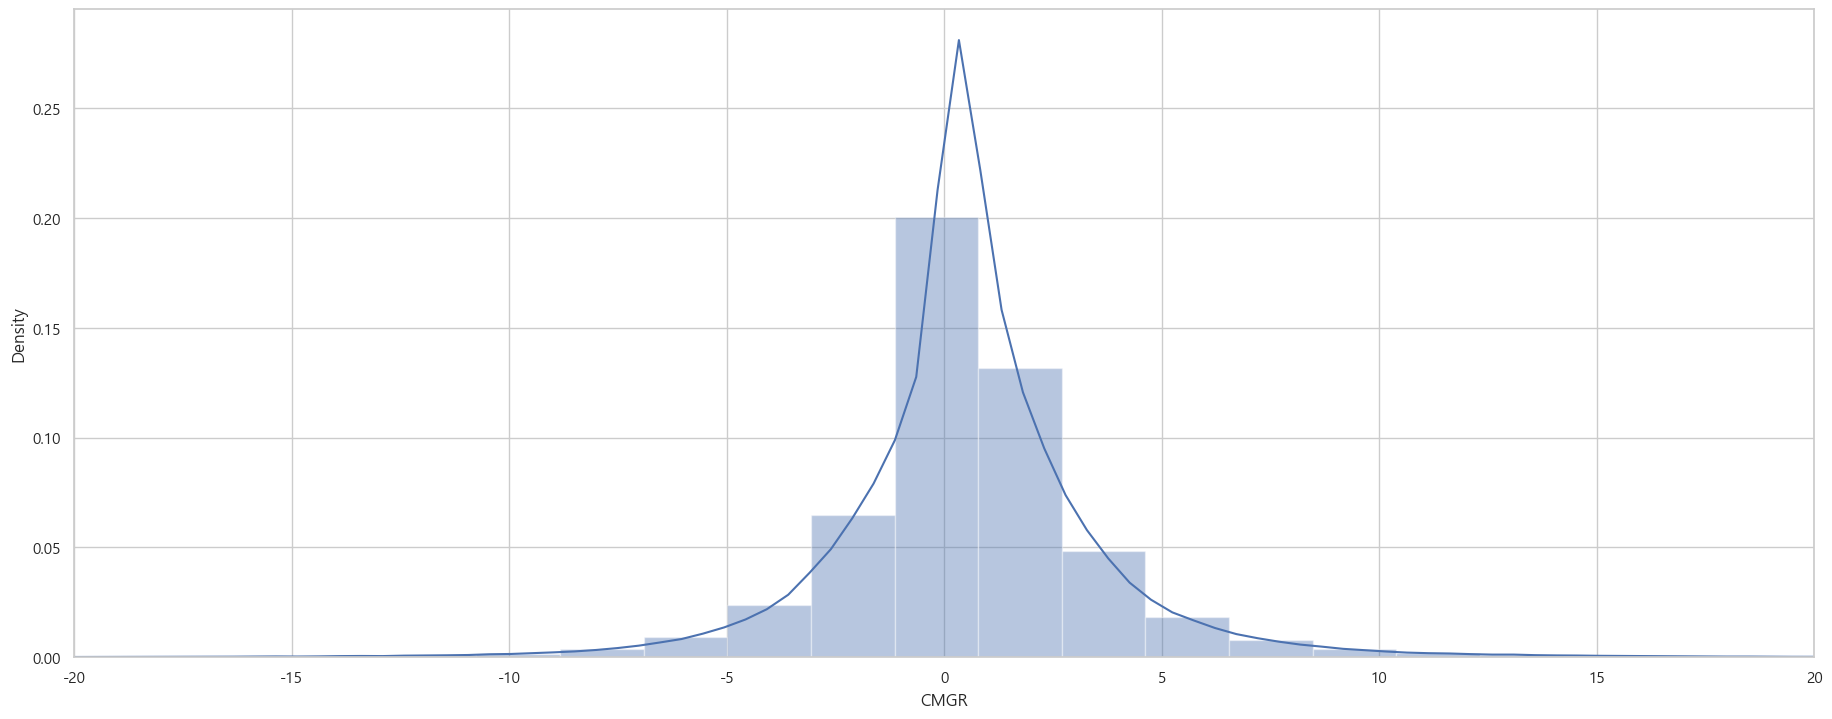

In [228]:
plt.figure(figsize=(20,8))
sns.distplot(cmgr.loc[cmgr['CMGR'].notnull(), 'CMGR'])
plt.xlim([-20,20])
plt.show()

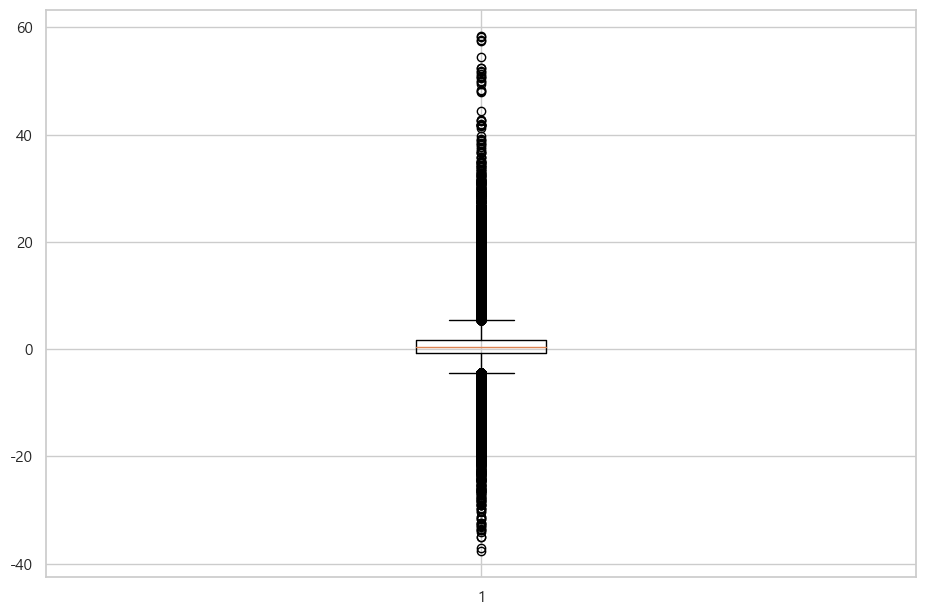

In [222]:
plt.boxplot(cmgr.loc[cmgr['CMGR'].notnull(), 'CMGR'])
plt.show()

In [230]:
MoM.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,MOM,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,0.00,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,-0.65,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,-0.55,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,-0.36,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,-0.75,14336


In [232]:
MoM.describe()

,자료생성년월,사업자번호,가입자수,신규,상실,평균월급,평균연봉,MOM,key
count,3545860.00,3545860.00,3545860.00,3545860.00,3545860.00,3545860.00,3545860.00,3545860.00,3545860.00
mean,5.50,367135.28,23.89,0.84,0.74,284.78,3417.43,1.04,177292.50
std,2.87,224432.05,309.44,8.30,7.50,83.64,1003.63,12.89,102360.18
min,1.00,101800.00,3.00,0.00,0.00,33.00,396.00,-98.88,0.00
25%,3.00,138817.00,4.00,0.00,0.00,226.00,2707.00,0.00,88646.00
50%,5.50,312861.00,7.00,0.00,0.00,280.00,3363.00,0.00,177292.50
75%,8.00,552810.00,15.00,1.00,1.00,338.00,4057.00,0.00,265939.00
max,10.00,910840.00,117613.00,2083.00,2344.00,553.00,6636.00,3225.54,354585.00


In [235]:
MoM.value_counts()

자료생성년월  사업장명                 사업자번호   도로명주소                 업종코드명               가입자수  신규  상실  평균월급  평균연봉  MOM    key   
1          (One+)용인동천노인복지센터  142826  경기도 용인시 수지구 동천로       기타                  31    1   3   111   1332  0.00   0         1
7       주식회사대풍               122880  경기도 부천시 삼작로           기타 산업용 기계 및 장비 도매업  5     0   1   295   3539  11.10  236395    1
        주식회사대치미래교육연합(충주지점)   386850  충청북도 충주시 호암토성2로       교육관련 자문 및 평가업       3     0   0   416   4986  2.45   236384    1
        주식회사대치잉글리쉬파크         430860  서울특별시 강남구 영동대로        일반 교과학원             32    1   0   269   3225  4.80   236385    1
        주식회사대치해냄             120879  서울특별시 강남구 삼성로71길      일반 교과학원             8     0   0   391   4689  1.96   236386    1
                                                                                                                         ..
4       더화이트커뮤니케이션(주)        192860  서울특별시 성동구 성수이로24길     응용 소프트웨어 개발 및 공급업   361   59  32  246   2953  4.78   118198    1
        더효종합건

In [245]:
MoM.loc[MoM['사업장명'] == '동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사']

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,MOM,key
3241500,1,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,5,2,0,254,3053,0.00,121782
3241501,2,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,5,1,0,285,3420,12.05,121782
3241502,3,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,5,1,0,325,3900,14.03,121782
3241503,4,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,5,1,0,311,3732,-4.33,121782
3241504,5,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,8,3,0,283,3392,45.46,121782
3241505,6,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,7,0,0,284,3411,-12.03,121782
3241506,7,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,164,159,0,403,4841,3225.54,121782
3241507,8,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,165,1,41,404,4848,0.76,121782
3241508,9,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,186,80,1,435,5222,21.41,121782
3241509,10,동원건설산업주식회사/일용/지오앤에스 용인 물류센터 신축공사,129867,,단독 주택 건설업 / 아파트 건설업 / 기타 공동 주택,185,0,16,433,5196,-1.03,121782


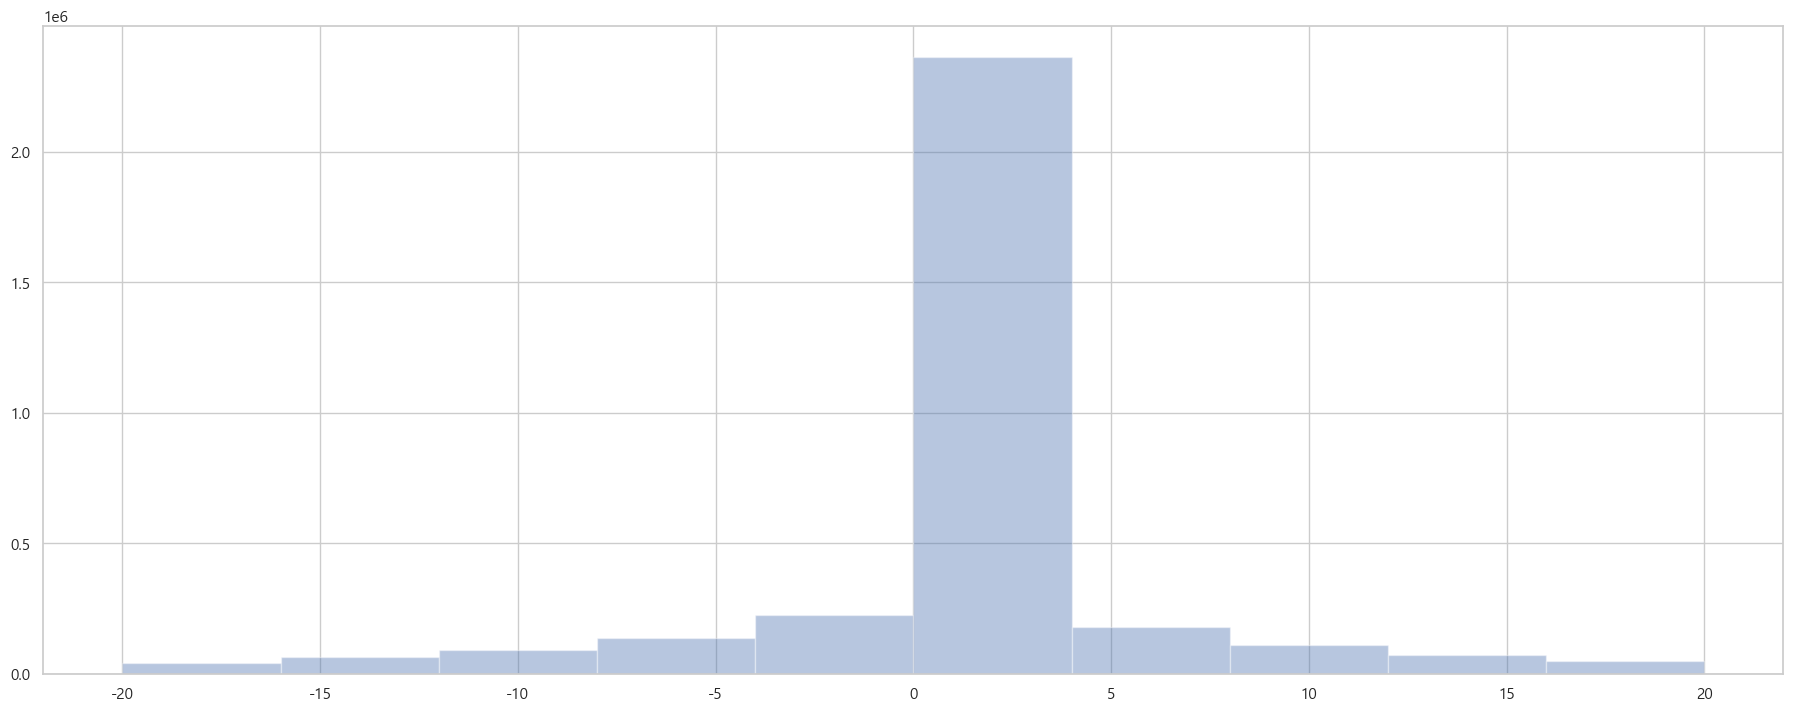

In [255]:
plt.figure(figsize=(20,8))
#sns.distplot(MoM.loc[MoM['MOM'].notnull(), 'MOM'])
plt.hist(MoM['MOM'], alpha = 0.4, range = [-20, 20])
#plt.xlim([-100,100])
plt.show()